In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_can = pd.read_excel("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx",
                      sheet_name = "Canada by Citizenship",
                      skiprows = range(20),
                      skipfooter = 2)

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [6]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df_can.rename(columns={"OdName":"Country", "RegName":"Region","AreaName":"Continent"}, inplace=True)

In [8]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
df_can.columns = list(map(str, df_can.columns))

df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [10]:
df_can.set_index('Country', inplace=True)

df_can.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

In [22]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30


In [23]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [25]:
print(df_can.shape)

(195, 38)


### Visualizing Data using Matplotlib

In [26]:
mpl.style.use('ggplot')

### Pie Charts

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

Step 1: Gather data.

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

1. Split: Splitting the data into groups based on some criteria.
2. Apply: Applying a function to each group independently:
- .sum()
- .count()
- .mean() 
- .std() 
- .aggregate()
- .apply()
- .etc..

3. Combine: Combining the results into a data structure.

In [29]:
df_continents = df_can.groupby("Continent", axis=0).sum()

df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,1237896
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,6635588
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,2821894
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,1530296
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,482284
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,110348


Step 2: Plot the data. We will pass in kind = 'pie' keyword, along with the following additional parameters:

- autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
- startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
- shadow - Draws a shadow beneath the pie (to give a 3D feel).

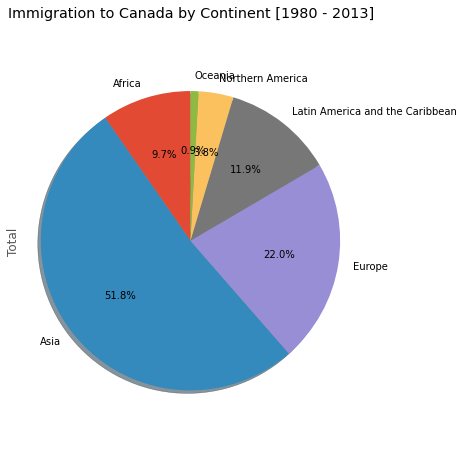

In [53]:
df_continents['Total'].plot(kind="pie",
                            figsize=(6,8),
                            autopct = '%1.1f%%',
                           startangle = 90,
                           shadow=True)

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

- Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
- Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
- Pass in a custom set of colors for continents by passing in colors parameter.
- Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.

In [56]:
for name in mpl.colors.cnames.items():
    print(name)

('aliceblue', '#F0F8FF')
('antiquewhite', '#FAEBD7')
('aqua', '#00FFFF')
('aquamarine', '#7FFFD4')
('azure', '#F0FFFF')
('beige', '#F5F5DC')
('bisque', '#FFE4C4')
('black', '#000000')
('blanchedalmond', '#FFEBCD')
('blue', '#0000FF')
('blueviolet', '#8A2BE2')
('brown', '#A52A2A')
('burlywood', '#DEB887')
('cadetblue', '#5F9EA0')
('chartreuse', '#7FFF00')
('chocolate', '#D2691E')
('coral', '#FF7F50')
('cornflowerblue', '#6495ED')
('cornsilk', '#FFF8DC')
('crimson', '#DC143C')
('cyan', '#00FFFF')
('darkblue', '#00008B')
('darkcyan', '#008B8B')
('darkgoldenrod', '#B8860B')
('darkgray', '#A9A9A9')
('darkgreen', '#006400')
('darkgrey', '#A9A9A9')
('darkkhaki', '#BDB76B')
('darkmagenta', '#8B008B')
('darkolivegreen', '#556B2F')
('darkorange', '#FF8C00')
('darkorchid', '#9932CC')
('darkred', '#8B0000')
('darksalmon', '#E9967A')
('darkseagreen', '#8FBC8F')
('darkslateblue', '#483D8B')
('darkslategray', '#2F4F4F')
('darkslategrey', '#2F4F4F')
('darkturquoise', '#00CED1')
('darkviolet', '#9400D3

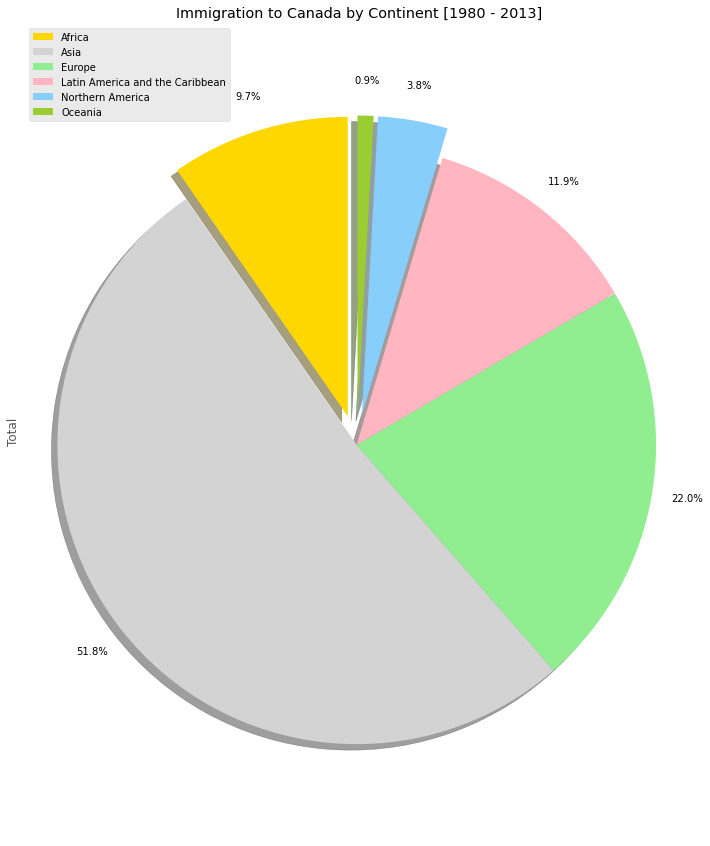

In [69]:
color_list = ['gold', 'lightgray', 'lightgreen', 'lightpink', 'lightskyblue', 'yellowgreen']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind="pie",
                           figsize=(12,15),
                           autopct = '%1.1f%%',
                           shadow=True,
                           startangle=90,
                            labels=None,
                           pctdistance = 1.12,
                           colors = color_list,
                           explode = explode_list)

plt.title('Immigration to Canada by Continent [1980 - 2013]') 

plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

### Box Plots 

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Step 1: Get the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to view the percentiles.

In [76]:
df_japan = df_can.loc[['Japan'], years]
df_japan = df_japan.transpose()
df_japan

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246
1985,198
1986,248
1987,422
1988,324
1989,494


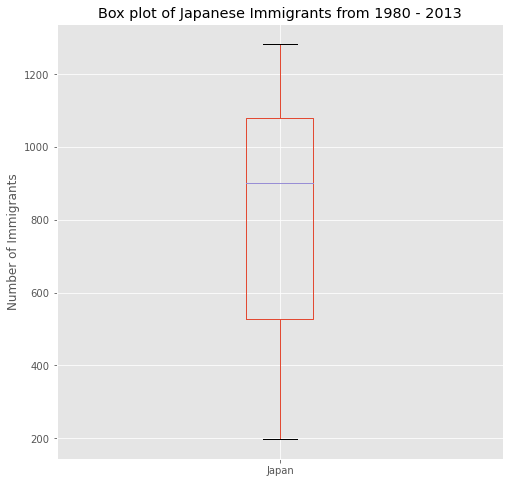

In [78]:
df_japan.plot(kind='box', figsize=(8,8))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [79]:
# We can view the actual numbers by calling the describe() method on the dataframe.

df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe df_CI.

In [83]:
df_india_china = df_can.loc[['India', 'China'], years]
df_india_china = df_india_china.transpose()
df_india_china.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


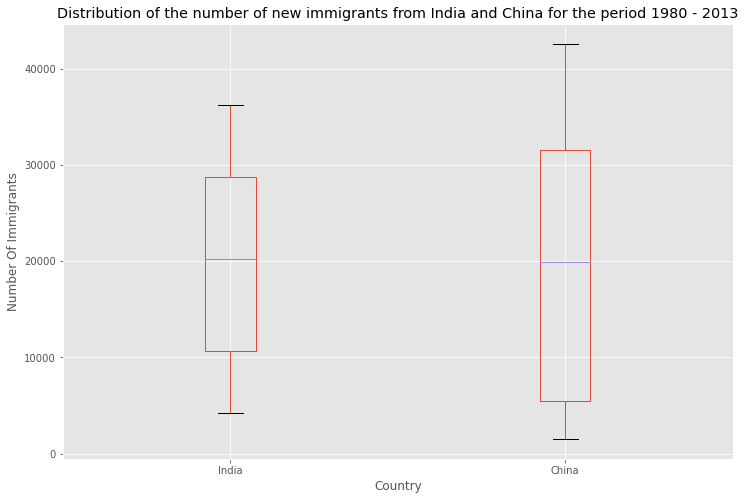

In [86]:
df_india_china.plot(kind="box", figsize = (12, 8))

plt.title("Distribution of the number of new immigrants from India and China for the period 1980 - 2013")
plt.xlabel("Country")
plt.ylabel("Number Of Immigrants")

plt.show()

In [87]:
df_india_china.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


### Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

Typical syntax is :

    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
Where

nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
plot_number is used to identify the particular subplot that this function is to create within the notional grid. plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.

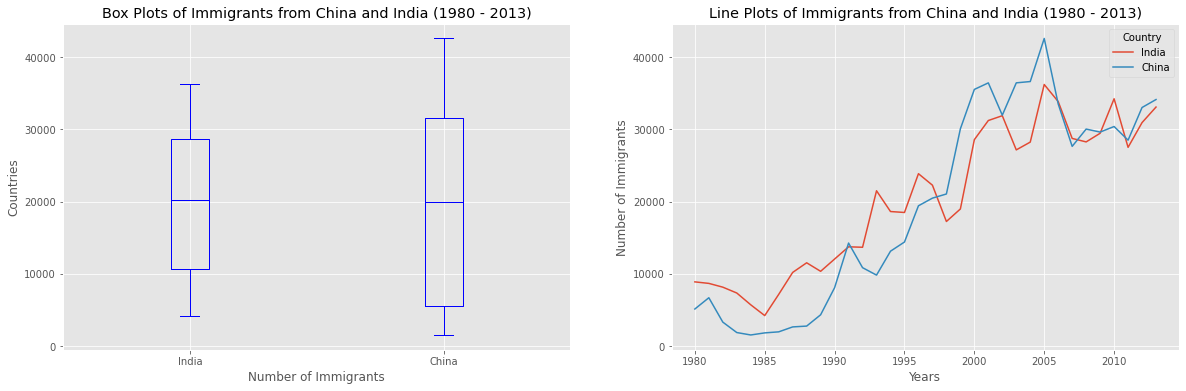

In [113]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
# ax2 = fig.add_subplot(2, 2, 3)
# ax3 = fig.add_subplot(2, 2, 4)


df_india_china.plot(kind="box", figsize=(20,6), color='blue', ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')


df_india_china.plot(kind="line", figsize=(20,6), ax=ax1)
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

# df_india_china.plot(kind="box", figsize=(20,6), color='blue', ax=ax2)
# ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
# ax0.set_xlabel('Number of Immigrants')
# ax0.set_ylabel('Countries')


# df_india_china.plot(kind="line", figsize=(20,6), ax=ax3)
# ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
# ax1.set_ylabel('Number of Immigrants')
# ax1.set_xlabel('Years')

plt.show()

Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [130]:
#Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

df_can.sort_values(["Total"], ascending= False, inplace=True, axis=0)


df_top15 = df_can.head(15)
df_top15.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,1383808
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,1319924
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,1103000
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,1022782
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,483200


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

- Create a list of all years in decades 80's, 90's, and 00's.
- Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
- Merge the three series into a new data frame. Call your dataframe new_df.

In [131]:
#Create a list of all years in decades 80's, 90's, and 00's.

years_1980s = list(map(str, range(1980,1990)))
years_1990s = list(map(str, range(1990,2000)))
years_2000s = list(map(str, range(2000,2010)))


In [139]:
#Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.

df_80s = df_top15.loc[:, years_1980s].sum(axis=1)
df_90s = df_top15.loc[:, years_1990s].sum(axis=1)
df_00s = df_top15.loc[:, years_2000s].sum(axis=1)



In [140]:
# Merge the three series into a new data frame. Call your dataframe new_df.

new_df = pd.DataFrame({"1980s":df_80s, "1990s":df_90s, "2000s":df_00s})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


Step 3: Plot the box plots.

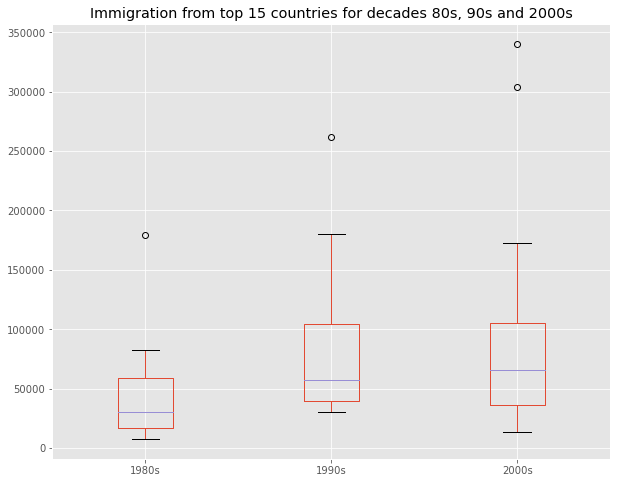

In [143]:
new_df.plot(kind="box", figsize=(10,8))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [146]:
desc = new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


In [149]:
temp = desc.loc['75%', '2000s'] - desc.loc['25%', '2000s']
outlier = desc.loc['75%', '2000s'] + (1.5 * temp)
outlier

209611.5

In [150]:
# let's check how many entries fall above the outlier threshold 

new_df[new_df['2000s'] > outlier]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


### Scatter Plots

#### Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

Step 1: Get the dataset. Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

In [163]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.head()

df_tot.index = map(int, df_tot.index)
df_tot.index

df_tot.reset_index(inplace=True)

df_tot.columns = ['years', 'total']
df_tot.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


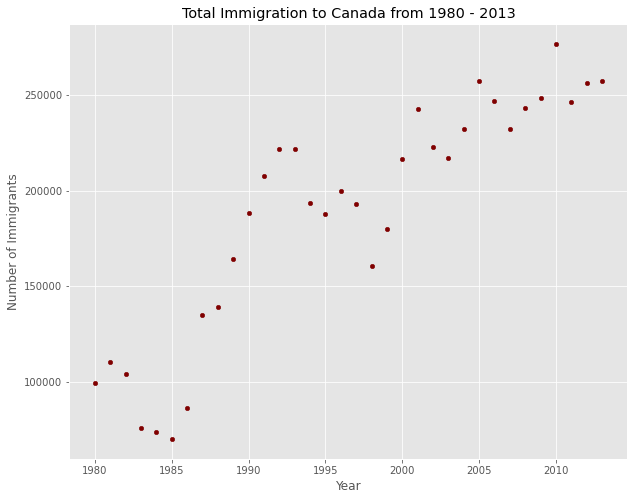

In [166]:
df_tot.plot(kind='scatter', x='years', y='total', figsize=(10,8), color = 'maroon')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

x: x-coordinates of the data.

y: y-coordinates of the data.

deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [167]:
fit = np.polyfit(df_tot['years'], df_tot['total'], 1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.

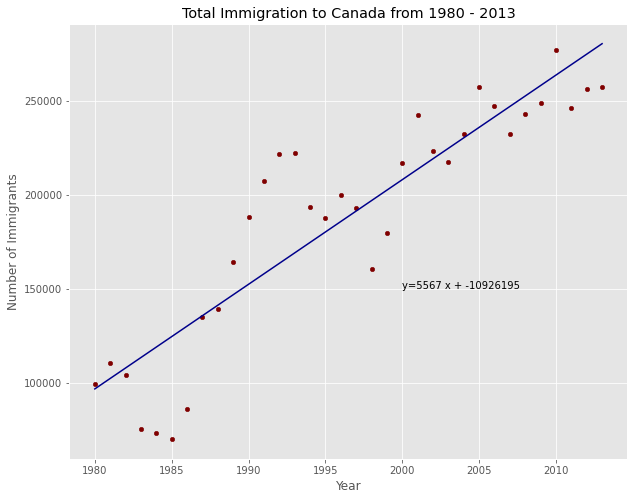

'No. Immigrants = 5567 * Year + -10926195'

In [175]:
df_tot.plot(kind='scatter', x='years', y='total', figsize=(10,8), color='maroon')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(df_tot['years'], df_tot['years'] * fit[0] + fit[1] , color = 'darkblue')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))


plt.show()


'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

### Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:

1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
3. Reset the index in place.
4. Rename the columns to year and total.
5. Display the resulting dataframe.

In [177]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_countries.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [189]:
df_total = pd.DataFrame(df_countries[years].sum(axis=0))
df_total

df_total.index = map(int, df_total.index)
df_total.index

df_total.reset_index(inplace=True)
df_total.index

df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


#### Step 2: Generate the scatter plot by plotting the total versus year in df_total.

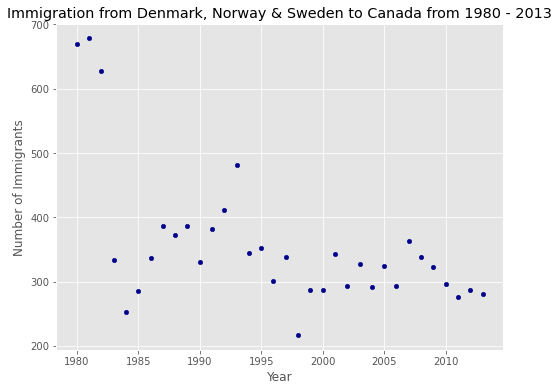

In [191]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(8,6), color='darkblue')

plt.title('Immigration from Denmark, Norway & Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### Bubble Plots

Argentina suffered a great depression from 1998 - 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and bring it in the dataframe

In [207]:
df_can_t = df_can[years].transpose()

df_can_t.head()

df_can_t.index = map(int, df_can_t.index)
df_can_t.index

df_can_t.reset_index(inplace=True)

df_can_t.rename(columns={'index':'year'}, inplace=True)
df_can_t.head()



Country,year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Andorra,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,New Caledonia,San Marino,Western Sahara,Marshall Islands,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,0,1,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,0,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Step 2: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0,1]. The general formula is:


In [201]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min())/(df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min())/(df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Step 3: Plot the data.

- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.
- We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

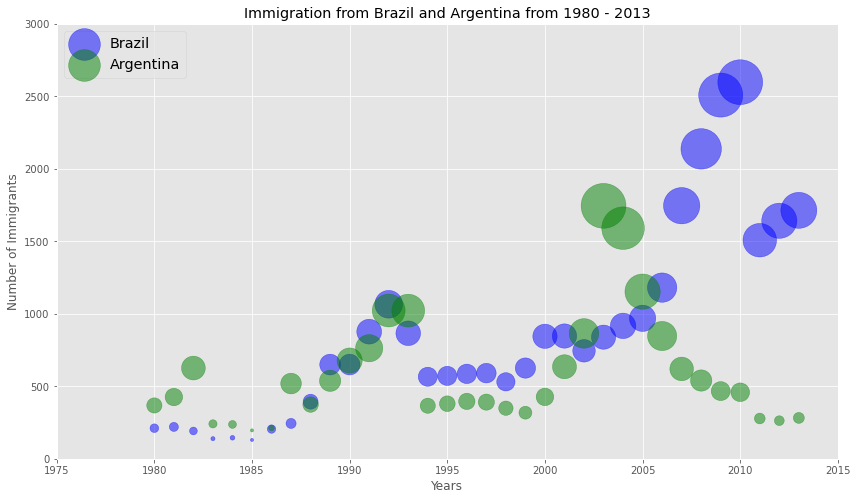

In [222]:
ax0 = df_can_t.plot(kind='scatter',
                   figsize=(14,8),
                   x='year',
                   y='Brazil',
                   color='blue',
                    alpha = 0.5,
                    s = norm_brazil * 2000 + 10,
                   xlim = (1975, 2015),
                   ylim = (0,3000))


ax1 = df_can_t.plot(kind='scatter',
                   x='year',
                   y='Argentina',
                   color='green',
                    alpha = 0.5,
                    s = norm_argentina * 2000 + 10,
                   ax = ax0)

ax0.set_ylabel("Number of Immigrants")
ax0.set_xlabel("Years")
ax0.set_title("Immigration from Brazil and Argentina from 1980 - 2013")
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Question: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use df_can_t that we defined and used in the previous example.

In [224]:
norm_india = (df_can_t['India'] - df_can_t['India'].min())/(df_can_t['India'].max() - df_can_t['India'].min())
norm_china = (df_can_t['China'] - df_can_t['China'].min())/(df_can_t['China'].max() - df_can_t['China'].min())


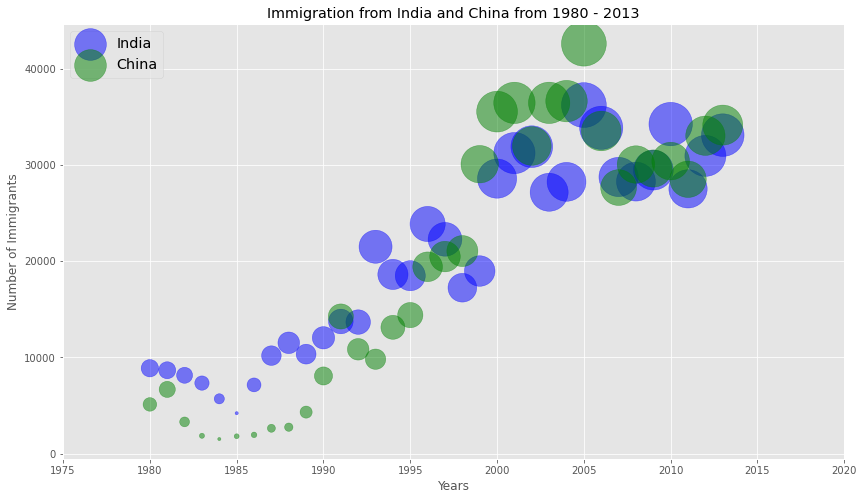

In [227]:
ax0 = df_can_t.plot(kind='scatter',
                   figsize=(14, 8),
                   color='blue',
                   alpha = 0.5,
                   x='year',
                   y='India',
                   s= norm_india * 2000 + 10,
                   xlim=(1975, 2020),
                   )

ax1 = df_can_t.plot(kind='scatter',
                   color='green',
                   alpha = 0.5,
                   x='year',
                   y='China',
                   s= norm_china * 2000 + 10,
                   ax=ax0)

ax0.set_xlabel('Years')
ax0.set_ylabel("Number of Immigrants")
ax0.set_title("Immigration from India and China from 1980 - 2013")
ax0.legend(['India', 'China'], loc='upper left', fontsize='x-large')